In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=20)     
plt.rc('ytick', labelsize=20)
import plotly.express as px

In [5]:
df = pd.read_csv("/content/netflix.csv")

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
x=df["type"].value_counts().reset_index()
px.pie(x,values="type",names="index")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


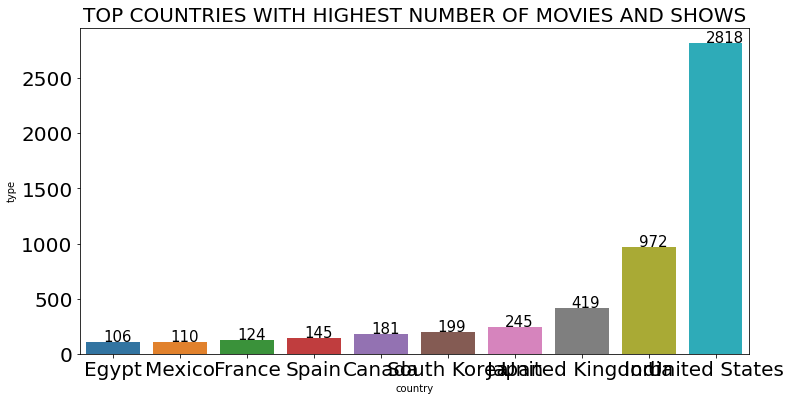

In [21]:
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
plt.figure(figsize=(12,6))
ax=sns.barplot(x=countries["country"],y=countries["type"] )
plt.title("TOP COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS",fontsize=20)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

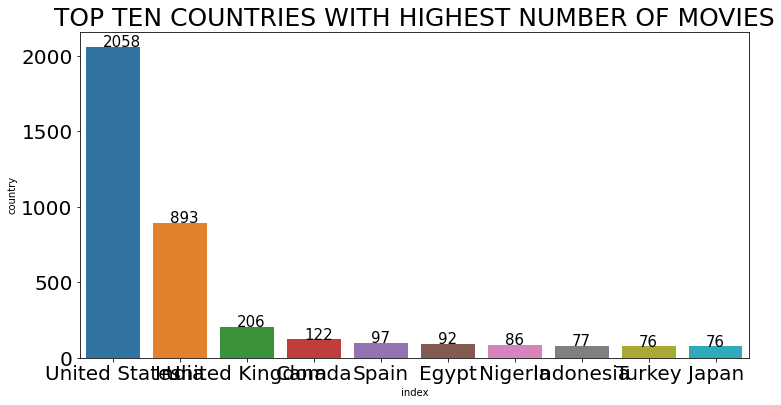

In [22]:
m=df[df["type"]=="Movie"]
movies=m["country"].value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES",fontsize=25)
ax=sns.barplot(x=movies["index"],y=movies["country"])
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

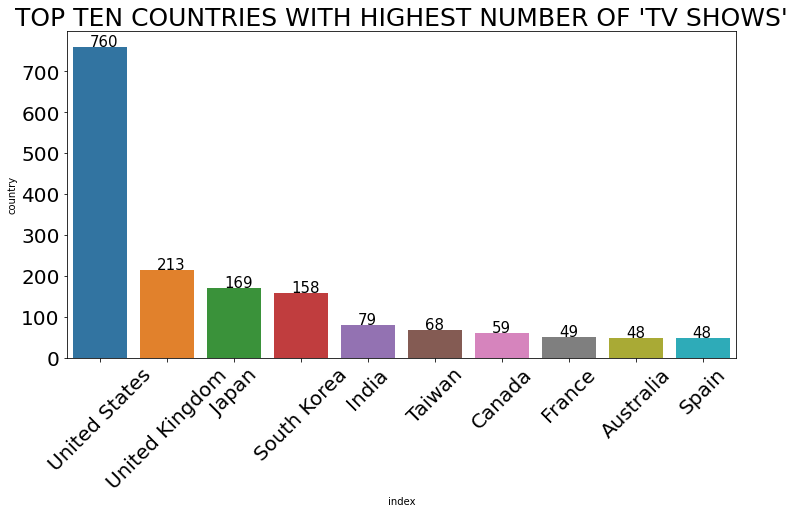

In [23]:
m=df[df["type"]=='TV Show']
movies=m["country"].value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF 'TV SHOWS'",fontsize=25)
ax=sns.barplot(x=movies["index"],y=movies["country"])
plt.xticks(rotation =45)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

In [10]:
country=df["country"]
country=country.dropna()

country=", ".join(country)
country=country.replace(',, ',', ')


country=country.split(", ")
country= list(Counter(country).items())
country.remove(('Vatican City', 1))
country.remove(('East Germany', 1))
print(country)


[('United States', 3690), ('South Africa', 62), ('India', 1046), ('Ghana', 5), ('Burkina Faso', 1), ('United Kingdom', 806), ('Germany', 226), ('Ethiopia', 1), ('Czech Republic', 22), ('Mexico', 169), ('Turkey', 113), ('Australia', 160), ('France', 393), ('Finland', 11), ('China', 162), ('Canada', 445), ('Japan', 318), ('Nigeria', 103), ('Spain', 232), ('Belgium', 90), ('South Korea', 231), ('Singapore', 41), ('Italy', 100), ('Romania', 14), ('Argentina', 91), ('Venezuela', 4), ('Hong Kong', 105), ('Russia', 27), ('', 2), ('Ireland', 46), ('Nepal', 2), ('New Zealand', 33), ('Brazil', 97), ('Greece', 11), ('Jordan', 9), ('Colombia', 52), ('Switzerland', 19), ('Israel', 30), ('Taiwan', 89), ('Bulgaria', 10), ('Algeria', 3), ('Poland', 41), ('Saudi Arabia', 13), ('Thailand', 70), ('Indonesia', 90), ('Egypt', 117), ('Denmark', 48), ('Kuwait', 8), ('Netherlands', 50), ('Malaysia', 26), ('Vietnam', 7), ('Hungary', 11), ('Sweden', 42), ('Lebanon', 31), ('Syria', 3), ('Philippines', 83), ('Ice

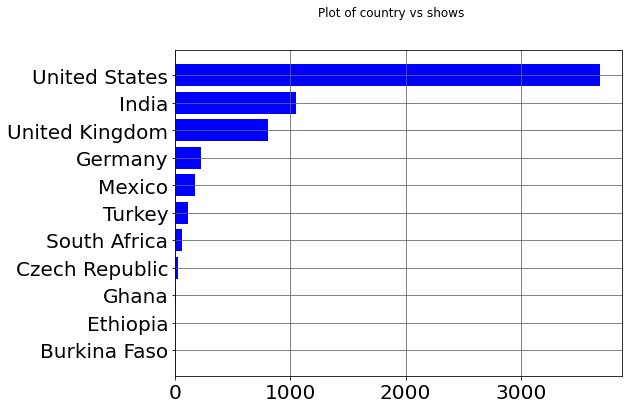

In [11]:
max_show_country=country[0:11]
max_show_country = pd.DataFrame(max_show_country) 
max_show_country= max_show_country.sort_values(1)

fig, ax = plt.subplots(1, figsize=(8, 6))
fig.suptitle('Plot of country vs shows')
ax.barh(max_show_country[0],max_show_country[1],color='blue')
plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.show()

In [12]:
df1=pd.read_csv('/content/country_code.csv')
df1=df1.drop(columns=['Unnamed: 2'])
df1.head()

,COUNTRY,CODE
0,afghanistan,AFG
1,albania,ALB
2,algeria,DZA
3,american samoa,ASM
4,andorra,AND


In [13]:
country_map = pd.DataFrame(country) 
country_map=country_map.sort_values(1,ascending=False)
location = pd.DataFrame(columns = ['CODE']) 
search_name=df1['COUNTRY']

for i in country_map[0]:
    x=df1[search_name.str.contains(i,case=False)] 
    x['CODE'].replace(' ','')
    location=location.append(x)

In [14]:
locations=[]
temp=location['CODE']
for i in temp:
    locations.append(i.replace(' ',''))

In [15]:
data = [dict( type = 'choropleth', locations=locations,z=list(country_map[1]),colorscale = [[0,"rgb(0,128,0)"],[0.50,"rgb(50,205,50)"],
                        [1,"rgb(124,252,0)"]], autocolorscale = False,reversescale = True)]
layout = dict(title = 'Graphical Representation of number of netflix movies and shows worldwide' )   
fig = dict( data=data, layout=layout )
iplot( fig )